In [ ]:
# DE3 -  Sergei Neznanov

library(gmm)
library(matrixStats)
library(sandwich)
library(lmtest)
library(tidyverse)
library(readxl)
library(stargazer)

datapath = "C:\\Users\\jessi\\Documents\\Rutgers\\Financial Econ\\Homework 3\\de03_fama_french_data.xlsx"
ff=read_excel(datapath,sheet="Factors")

attach(ff)
head(ff)
summary(ff)


port=read_excel(datapath,sheet="25 Portfolios")

attach(port)
head(port)
summary(port)

ffdata=cbind(ff,port)
ffrf <-ffdata-RF
summary(ffrf)

print("R11 is the Small Cap Lowest BM Portfolio, R15 is the small cap Highest BM ")
mean_ffrf<-colMeans(ffrf[1:25])
report<-matrix(mean_ffrf,5,5)
report
print("Returns are generally decreasing in Book to Market and generally increasing in Market Cap")
stargazer(report)


rpt<-c(1:25)
ai<-c(1:25)
beta_m<-c(1:25)
tratioa<-c(1:25)
tratiob<-c(1:25)
r2<-c(1:25)
rthat<-c(1:25)
eri<-c(1:25)

# Estimate single factor model beta for the 25 portfolios
for (i in 1:25)
{
  ff_t<-lm(ffrf[,i]~RMRF)
  print(summary(ff_t))
  beta<-summary(ff_t)$coefficients
  print(beta)
  ai[i]=beta[1,1]
  tratioa[i]=beta[1,3]
  beta_m[i]=beta[2,1]
  tratiob[i]=beta[2,3]
  r2[i]<-summary(ff_t)$r.squared
  eri[i]=mean(ffrf[,i])
  rthat[i]=beta_m[i]*mean(RMRF)
}

# Tables similar to Fama-French for portfolios
report<-matrix(beta_m,5,5)
report
report<-matrix(tratiob,5,5)
report
report<-matrix(ai,5,5)
report
report<-matrix(tratioa,5,5)
report

port=c("R11","R12","R13","R14","R15","R21","R22","R23","R24","R25","R31","R32","R33","R34","R35","R41","R42","R43","R44","R45","R51","R52","R53","R54","R55")
barplot(beta_m, main="Market Betas for Single Factor Model", horiz=FALSE, names.arg=port, cex.names=0.8,col="blue")
barplot(r2, main="Single Factor R^2", horiz=FALSE, names.arg=port, cex.names=0.8,col="blue")




Graph the R2 for each portfolio. 

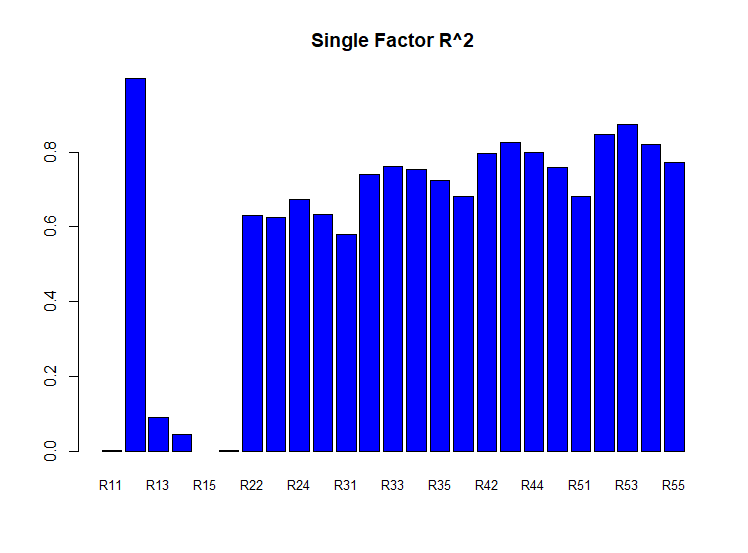

> nr=nrow(ffrf)
> lambda_m<-c(1:nr)
> # alpha_i<-matrix(0,nr,25)
> alpha_i<-c(1:nr)
> 
> # Time series of cross section
> for (i in 1:nr)
+ {
+   # Make the returns into a vector
+   cross_data<-unlist(ffrf[i,],use.names=FALSE)
+   ff_fama_macbeth<-lm(cross_data~beta_m)
+   print(summary(ff_fama_macbeth))
+   lambda<-summary(ff_fama_macbeth)$coefficients
+   lambda_m[i]=lambda[2,1]
+   # alpha_i[i]=summary(ff_fama_macbeth)$residuals
+   alpha_i[i]=lambda[1,1]
+ }
Error in model.frame.default(formula = cross_data ~ beta_m, drop.unused.levels = TRUE) : 
  variable lengths differ (found for 'beta_m')
> 
> # Time series of cross section
> for (i in 1:2)
+ {
+   # Make the returns into a vector
+   cross_data<-unlist(ffrf[i,],use.names=FALSE)
+   ff_fama_macbeth<-lm(cross_data~beta_m)
+   print(summary(ff_fama_macbeth))
+   lambda<-summary(ff_fama_macbeth)$coefficients
+   lambda_m[i]=lambda[2,1]
+   # alpha_i[i]=summary(ff_fama_macbeth)$residuals
+   alpha_i[i]=lambda[1,1]
+ }
Error in model.frame.default(formula = cross_data ~ beta_m, drop.unused.levels = TRUE) : 
  variable lengths differ (found for 'beta_m')
> 
> 
> print("Fama-Macbeth standard errors")
[1] "Fama-Macbeth standard errors"
> mean(alpha_i)
[1] 355.5
> se_alpha_i=(sd(alpha_i)/sqrt(nr-1))
> se_alpha_i
[1] 7.702829
> mean(lambda_m)
[1] 355.5
> se_lambda_m=(sd(lambda_m)/sqrt(nr-1))
> se_lambda_m
[1] 7.702829
> 
> ## Collect all the different standard error estimates in a table.
> 
> se_table=matrix(nrow=2,ncol=5)
> se_table[1,1]=mean(alpha_i)
> se_table[2,1]=mean(lambda_m)
> se_table[1,2]=se_alpha_i
> se_table[2,2]=se_lambda_m
> 
> # Cross section of average returns single factor
> # Note that this returns the same point estimates as Fama-Macbeth
> ff_cross<-lm(mean_ffrf~beta_m)
> resid<-summary(ff_cross)$residuals
> # cat(mean_ffrf,file="f:/rutgers/econ514/code/returns.csv",sep=",")
> # cat(resid,file="f:/rutgers/econ514/code/resid.csv",sep=",")
> print("OLS standard errors")
[1] "OLS standard errors"
> ols=summary(ff_cross)$coefficients
> print(ols)
             Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -12067.38  1104.3849 -10.92679 1.399637e-10
beta_m       12431.14   226.1646  54.96501 6.574726e-26
> se_table[1,3]=ols[1,2]
> se_table[2,3]=ols[2,2]
> print("White standard errors")
[1] "White standard errors"
> hw=coeftest(ff_cross, df = Inf, vcov = vcovHC(ff_cross, type = "HC0"))
> se_table[1,4]=hw[1,2]
> se_table[2,4]=hw[2,2]
> print(hw)

z test of coefficients:

             Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -12067.38    1162.14 -10.384 < 2.2e-16 ***
beta_m       12431.14     119.44 104.080 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

> print("Newey-West")
[1] "Newey-West"
> nw=NeweyWest(ff_cross, lag = 4, prewhite = FALSE)
> se_table[1,5]=nw[1,1]
> se_table[2,5]=nw[2,2]
> print(nw)
            (Intercept)     beta_m
(Intercept)   2768329.8 -186735.66
beta_m        -186735.7   13947.05
> 
> se_table
      [,1]     [,2]      [,3]      [,4]       [,5]
[1,] 355.5 7.702829 1104.3849 1162.1393 2768329.84
[2,] 355.5 7.702829  226.1646  119.4388   13947.05
> ols=summary(ff_cross)$coefficients
> # DE3 -  Sergei Neznanov
> 
> library(gmm)
> library(matrixStats)
> library(sandwich)
> library(lmtest)
> library(tidyverse)
> library(readxl)
> library(stargazer)
> 
> datapath = "C:\\Users\\jessi\\Documents\\Rutgers\\Financial Econ\\Homework 3\\de03_fama_french_data.xlsx"
> ff=read_excel(datapath,sheet="Factors")
> 
> attach(ff)
The following object is masked from port:

    idate

The following objects are masked from ff (pos = 4):

    HML, idate, RF, RMRF, SMB

> head(ff)
# A tibble: 6 x 5
   idate  RMRF   SMB   HML    RF
   <dbl> <dbl> <dbl> <dbl> <dbl>
1 196307 -0.39 -0.45 -0.97  0.27
2 196308  5.07 -0.98  1.8   0.25
3 196309 -1.57 -0.33  0.13  0.27
4 196310  2.53 -0.58 -0.1   0.29
5 196311 -0.85 -1.17  1.75  0.27
6 196312  1.83 -2.16 -0.02  0.29
> summary(ff)
     idate             RMRF               SMB                HML                 RF        
 Min.   :196307   Min.   :-23.2400   Min.   :-17.2300   Min.   :-13.9700   Min.   :0.0000  
 1st Qu.:197804   1st Qu.: -1.9675   1st Qu.: -1.6575   1st Qu.: -1.3875   1st Qu.:0.1400  
 Median :199302   Median :  0.9150   Median :  0.1250   Median :  0.2450   Median :0.3800  
 Mean   :199265   Mean   :  0.5573   Mean   :  0.1931   Mean   :  0.2981   Mean   :0.3626  
 3rd Qu.:200711   3rd Qu.:  3.4000   3rd Qu.:  2.0300   3rd Qu.:  1.7500   3rd Qu.:0.5100  
 Max.   :202208   Max.   : 16.1000   Max.   : 21.4200   Max.   : 12.7500   Max.   :1.3500  
> 
> 
> port=read_excel(datapath,sheet="25 Portfolios")
> 
> attach(port)
The following object is masked from ff (pos = 3):

    idate

The following objects are masked from port (pos = 4):

    idate, R11, R12, R13, R14, R15, R21, R22, R23, R24, R25, R31, R32, R33, R34, R35, R41, R42, R43, R44, R45, R51, R52,
    R53, R54, R55

The following object is masked from ff (pos = 5):

    idate

> head(port)
# A tibble: 6 x 26
   idate   R11    R12    R13     R14    R15    R21    R22    R23    R24    R25    R31    R32    R33    R34    R35    R41    R42    R43
   <dbl> <dbl>  <dbl>  <dbl>   <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
1 196307  1.13 -0.309  0.708  0.106  -1.32  -1.81   0.190 -1.01  -1.96  -1.19  -2.35  -1.69  -0.658 -2.13  -1.80  -0.981 -1.68  -1.92 
2 196308  4.24  1.38   1.50   2.38    4.76   5.57   4.52   4.44   4.42   8.23   5.08   5.30   5.39   4.83   5.15   5.43   4.73   6.23 
3 196309 -2.89  0.626 -1.02  -1.6    -0.432 -4.05  -1.50  -0.880 -1.18  -2.91  -4.32  -1.90  -0.470 -0.450 -1.82  -2.80  -2.08  -1.78 
4 196310  1.29 -0.707  1.31   0.0855  2.40   1.19   4.23   2.35   2.20   3.93   2.40   0.426  2.38   2.05   1.07  -0.390  0.683  2.62 
5 196311 -3.38 -3.75  -1.81  -1.05   -1.05  -4.26  -1.75  -0.781 -0.100 -0.113 -3.00  -1.29  -0.968 -0.822 -1.21  -0.880 -0.643 -0.793
6 196312 -2.35 -1.06  -0.943 -1.65   -1.14  -0.874 -0.756  1.02   0.890  0.121  0.163  1.64   0.690  1.60   0.466 -0.120  1.23   1.70 
# ... with 7 more variables: R44 <dbl>, R45 <dbl>, R51 <dbl>, R52 <dbl>, R53 <dbl>, R54 <dbl>, R55 <dbl>
# i Use `colnames()` to see all variable names
> summary(port)
     idate             R11                R12               R13               R14               R15               R21          
 Min.   :196307   Min.   :-34.3918   Min.   :-30.825   Min.   :-29.098   Min.   :-28.739   Min.   :-28.711   Min.   :-32.6296  
 1st Qu.:197804   1st Qu.: -3.9975   1st Qu.: -2.662   1st Qu.: -2.325   1st Qu.: -1.516   1st Qu.: -1.518   1st Qu.: -3.3982  
 Median :199302   Median :  0.9644   Median :  1.113   Median :  1.310   Median :  1.419   Median :  1.454   Median :  1.2031  
 Mean   :199265   Mean   :  0.6683   Mean   :  1.167   Mean   :  1.143   Mean   :  1.349   Mean   :  1.491   Mean   :  0.8942  
 3rd Qu.:200711   3rd Qu.:  5.1877   3rd Qu.:  5.364   3rd Qu.:  4.664   3rd Qu.:  4.506   3rd Qu.:  4.806   3rd Qu.:  5.3434  
 Max.   :202208   Max.   : 37.7711   Max.   : 42.748   Max.   : 28.148   Max.   : 27.978   Max.   : 41.508   Max.   : 28.1572  
      R22               R23               R24               R25               R31                R32               R33         
 Min.   :-31.936   Min.   :-28.540   Min.   :-24.660   Min.   :-32.249   Min.   :-29.8395   Min.   :-28.881   Min.   :-24.772  
 1st Qu.: -2.218   1st Qu.: -1.697   1st Qu.: -1.821   1st Qu.: -1.738   1st Qu.: -3.1509   1st Qu.: -1.814   1st Qu.: -1.701  
 Median :  1.537   Median :  1.531   Median :  1.701   Median :  1.753   Median :  1.4582   Median :  1.352   Median :  1.508  
 Mean   :  1.147   Mean   :  1.224   Mean   :  1.250   Mean   :  1.384   Mean   :  0.9025   Mean   :  1.161   Mean   :  1.112  
 3rd Qu.:  4.817   3rd Qu.:  4.283   3rd Qu.:  4.521   3rd Qu.:  5.009   3rd Qu.:  5.2043   3rd Qu.:  4.480   3rd Qu.:  4.149  
 Max.   : 26.364   Max.   : 26.797   Max.   : 27.161   Max.   : 30.132   Max.   : 23.0405   Max.   : 24.991   Max.   : 22.002  
      R34               R35               R41               R42               R43               R44               R45         
 Min.   :-26.953   Min.   :-31.246   Min.   :-25.973   Min.   :-29.186   Min.   :-24.878   Min.   :-32.741   Min.   :-32.477  
 1st Qu.: -1.355   1st Qu.: -1.424   1st Qu.: -2.339   1st Qu.: -1.802   1st Qu.: -1.744   1st Qu.: -1.573   1st Qu.: -1.792  
 Median :  1.478   Median :  1.587   Median :  1.143   Median :  1.246   Median :  1.370   Median :  1.553   Median :  1.672  
 Mean   :  1.236   Mean   :  1.358   Mean   :  1.011   Mean   :  1.011   Mean   :  1.084   Mean   :  1.189   Mean   :  1.251  
 3rd Qu.:  4.311   3rd Qu.:  4.561   3rd Qu.:  4.642   3rd Qu.:  4.055   3rd Qu.:  4.104   3rd Qu.:  3.993   3rd Qu.:  4.588  
 Max.   : 23.550   Max.   : 29.204   Max.   : 25.880   Max.   : 20.012   Max.   : 23.875   Max.   : 24.196   Max.   : 27.898  
      R51                R52                R53                R54                R55         
 Min.   :-21.6599   Min.   :-22.4611   Min.   :-21.9028   Min.   :-27.4801   Min.   :-28.401  
 1st Qu.: -1.6673   1st Qu.: -1.6328   1st Qu.: -1.5067   1st Qu.: -1.4915   1st Qu.: -2.018  
 Median :  1.0504   Median :  1.0771   Median :  1.2406   Median :  1.0991   Median :  1.310  
 Mean   :  0.9298   Mean   :  0.9023   Mean   :  0.9422   Mean   :  0.8799   Mean   :  1.025  
 3rd Qu.:  3.8153   3rd Qu.:  3.5410   3rd Qu.:  3.4508   3rd Qu.:  3.5702   3rd Qu.:  4.345  
 Max.   : 22.1905   Max.   : 16.5312   Max.   : 18.4571   Max.   : 19.8613   Max.   : 22.113  
> 
> ffdata=cbind(ff,port)
> ffrf <-ffdata-RF
> summary(ffrf)
     idate             RMRF               SMB                HML                  RF        idate             R11          
 Min.   :196307   Min.   :-23.8400   Min.   :-17.7000   Min.   :-14.10000   Min.   :0   Min.   :196307   Min.   :-34.9918  
 1st Qu.:197804   1st Qu.: -2.3475   1st Qu.: -1.8800   1st Qu.: -1.73750   1st Qu.:0   1st Qu.:197804   1st Qu.: -4.2639  
 Median :199301   Median :  0.5550   Median : -0.2250   Median : -0.14000   Median :0   Median :199301   Median :  0.5589  
 Mean   :199264   Mean   :  0.1946   Mean   : -0.1696   Mean   : -0.06455   Mean   :0   Mean   :199264   Mean   :  0.3057  
 3rd Qu.:200710   3rd Qu.:  3.0500   3rd Qu.:  1.6525   3rd Qu.:  1.39000   3rd Qu.:0   3rd Qu.:200710   3rd Qu.:  4.8733  
 Max.   :202208   Max.   : 15.5900   Max.   : 20.9900   Max.   : 12.75000   Max.   :0   Max.   :202208   Max.   : 37.3411  
      R12                R13                R14                R15               R21                R22                R23          
 Min.   :-31.4254   Min.   :-29.6978   Min.   :-29.3388   Min.   :-29.311   Min.   :-33.2296   Min.   :-32.5357   Min.   :-29.1400  
 1st Qu.: -2.9388   1st Qu.: -2.7489   1st Qu.: -1.9202   1st Qu.: -1.932   1st Qu.: -3.8766   1st Qu.: -2.6317   1st Qu.: -2.1370  
 Median :  0.7317   Median :  1.0193   Median :  1.0485   Median :  1.033   Median :  0.9886   Median :  1.2382   Median :  1.1732  
 Mean   :  0.8045   Mean   :  0.7802   Mean   :  0.9867   Mean   :  1.128   Mean   :  0.5315   Mean   :  0.7839   Mean   :  0.8617  
 3rd Qu.:  4.9568   3rd Qu.:  4.4497   3rd Qu.:  4.1590   3rd Qu.:  4.449   3rd Qu.:  5.0104   3rd Qu.:  4.4500   3rd Qu.:  3.9037  
 Max.   : 42.3180   Max.   : 27.5675   Max.   : 27.3984   Max.   : 41.498   Max.   : 27.7272   Max.   : 25.7839   Max.   : 26.2175  
      R24                R25               R31                R32                R33                R34                R35          
 Min.   :-25.2596   Min.   :-32.379   Min.   :-30.4395   Min.   :-29.4806   Min.   :-25.3719   Min.   :-27.0827   Min.   :-31.3763  
 1st Qu.: -2.1414   1st Qu.: -2.096   1st Qu.: -3.5584   1st Qu.: -2.2043   1st Qu.: -2.0537   1st Qu.: -1.8639   1st Qu.: -1.8800  
 Median :  1.3982   Median :  1.408   Median :  1.0743   Median :  1.0507   Median :  1.1635   Median :  1.1165   Median :  1.1923  
 Mean   :  0.8875   Mean   :  1.021   Mean   :  0.5399   Mean   :  0.7987   Mean   :  0.7492   Mean   :  0.8733   Mean   :  0.9958  
 3rd Qu.:  4.0942   3rd Qu.:  4.690   3rd Qu.:  4.7292   3rd Qu.:  4.0774   3rd Qu.:  3.7309   3rd Qu.:  4.0545   3rd Qu.:  4.2329  
 Max.   : 26.5806   Max.   : 29.552   Max.   : 22.6105   Max.   : 24.4111   Max.   : 21.4219   Max.   : 22.9699   Max.   : 28.6239  
      R41                R42                R43                R44                R45                R51                R52          
 Min.   :-26.5733   Min.   :-29.7855   Min.   :-25.0402   Min.   :-32.8713   Min.   :-32.6071   Min.   :-22.2599   Min.   :-23.0611  
 1st Qu.: -2.7699   1st Qu.: -2.1933   1st Qu.: -2.0282   1st Qu.: -1.9542   1st Qu.: -2.1551   1st Qu.: -2.0540   1st Qu.: -2.0048  
 Median :  0.8668   Median :  0.9388   Median :  1.0518   Median :  1.2185   Median :  1.2939   Median :  0.7137   Median :  0.7604  
 Mean   :  0.6479   Mean   :  0.6485   Mean   :  0.7215   Mean   :  0.8265   Mean   :  0.8886   Mean   :  0.5672   Mean   :  0.5397  
 3rd Qu.:  4.3187   3rd Qu.:  3.7918   3rd Qu.:  3.7093   3rd Qu.:  3.7382   3rd Qu.:  4.2687   3rd Qu.:  3.4940   3rd Qu.:  3.1748  
 Max.   : 25.4501   Max.   : 19.4318   Max.   : 23.2950   Max.   : 23.6157   Max.   : 27.3184   Max.   : 21.6805   Max.   : 16.1112  
      R53                R54                R55          
 Min.   :-22.5028   Min.   :-27.5601   Min.   :-28.5309  
 1st Qu.: -1.8126   1st Qu.: -1.9753   1st Qu.: -2.5123  
 Median :  0.8388   Median :  0.7213   Median :  0.9442  
 Mean   :  0.5795   Mean   :  0.5172   Mean   :  0.6622  
 3rd Qu.:  3.1174   3rd Qu.:  3.2532   3rd Qu.:  3.9370  
 Max.   : 17.4971   Max.   : 19.2813   Max.   : 21.9680  
> 
> print("R11 is the Small Cap Lowest BM Portfolio, R15 is the small cap Highest BM ")
[1] "R11 is the Small Cap Lowest BM Portfolio, R15 is the small cap Highest BM "
> mean_ffrf<-colMeans(ffrf[1:25])
> report<-matrix(mean_ffrf,5,5)
> report
              [,1]         [,2]      [,3]      [,4]      [,5]
[1,]  1.992645e+05 1.992645e+05 1.1279580 1.0214566 0.9958217
[2,]  1.946197e-01 3.057141e-01 0.5315323 0.5398624 0.6479114
[3,] -1.695775e-01 8.044749e-01 0.7838701 0.7986937 0.6484685
[4,] -6.454930e-02 7.802394e-01 0.8617375 0.7491617 0.7214945
[5,]  0.000000e+00 9.867182e-01 0.8874603 0.8733041 0.8264741
> print("Returns are generally decreasing in Book to Market and generally increasing in Market Cap")
[1] "Returns are generally decreasing in Book to Market and generally increasing in Market Cap"
> stargazer(report)

% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Oct 18, 2022 - 11:32:41 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} ccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
$199,264.500$ & $199,264.500$ & $1.128$ & $1.021$ & $0.996$ \\ 
$0.195$ & $0.306$ & $0.532$ & $0.540$ & $0.648$ \\ 
$$-$0.170$ & $0.804$ & $0.784$ & $0.799$ & $0.648$ \\ 
$$-$0.065$ & $0.780$ & $0.862$ & $0.749$ & $0.721$ \\ 
$0$ & $0.987$ & $0.887$ & $0.873$ & $0.826$ \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 
> 
> 
> rpt<-c(1:25)
> ai<-c(1:25)
> beta_m<-c(1:25)
> tratioa<-c(1:25)
> tratiob<-c(1:25)
> r2<-c(1:25)
> rthat<-c(1:25)
> eri<-c(1:25)
> 
> # Estimate single factor model beta for the 25 portfolios
> for (i in 1:25)
+ {
+   ff_t<-lm(ffrf[,i]~RMRF)
+   print(summary(ff_t))
+   beta<-summary(ff_t)$coefficients
+   print(beta)
+   ai[i]=beta[1,1]
+   tratioa[i]=beta[1,3]
+   beta_m[i]=beta[2,1]
+   tratiob[i]=beta[2,3]
+   r2[i]<-summary(ff_t)$r.squared
+   eri[i]=mean(ffrf[,i])
+   rthat[i]=beta_m[i]*mean(RMRF)
+ }

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-3032.91 -1484.57    -3.09  1479.02  3108.72 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 199255.04      64.64 3082.376   <2e-16 ***
RMRF            16.89      14.34    1.178    0.239    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1709 on 708 degrees of freedom
Multiple R-squared:  0.001956,	Adjusted R-squared:  0.0005462 
F-statistic: 1.387 on 1 and 708 DF,  p-value: 0.2392

                Estimate Std. Error     t value  Pr(>|t|)
(Intercept) 199255.03872   64.64332 3082.376103 0.0000000
RMRF            16.88877   14.33782    1.177918 0.2392251

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97229 -0.13600 -0.00929  0.22515  0.40772 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.365514   0.010113  -36.14   <2e-16 ***
RMRF         1.005169   0.002243  448.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2674 on 708 degrees of freedom
Multiple R-squared:  0.9965,	Adjusted R-squared:  0.9965 
F-statistic: 2.008e+05 on 1 and 708 DF,  p-value: < 2.2e-16

              Estimate  Std. Error   t value      Pr(>|t|)
(Intercept) -0.3655144 0.010113411 -36.14155 6.746169e-163
RMRF         1.0051692 0.002243143 448.10744  0.000000e+00

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.4910  -1.8550  -0.0753   1.6576  20.7680 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.28487    0.11070  -2.573   0.0103 *  
RMRF         0.20689    0.02455   8.426   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.927 on 708 degrees of freedom
Multiple R-squared:  0.09114,	Adjusted R-squared:  0.08986 
F-statistic:    71 on 1 and 708 DF,  p-value: < 2.2e-16

              Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -0.2848698  0.1107039 -2.573259 1.027700e-02
RMRF         0.2068939  0.0245540  8.426077 1.989619e-16

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.976  -1.603  -0.059   1.557  11.868 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01297    0.10950   0.118    0.906    
RMRF        -0.13911    0.02429  -5.728  1.5e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.895 on 708 degrees of freedom
Multiple R-squared:  0.04429,	Adjusted R-squared:  0.04294 
F-statistic: 32.81 on 1 and 708 DF,  p-value: 1.503e-08

               Estimate Std. Error    t value     Pr(>|t|)
(Intercept)  0.01297244 0.10949931  0.1184705 9.057285e-01
RMRF        -0.13911394 0.02428682 -5.7279592 1.502980e-08

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
   Min     1Q Median     3Q    Max 
     0      0      0      0      0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)        0          0     NaN      NaN
RMRF               0          0     NaN      NaN

Residual standard error: 0 on 708 degrees of freedom
Multiple R-squared:    NaN,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 1 and 708 DF,  p-value: NA

            Estimate Std. Error t value Pr(>|t|)
(Intercept)        0          0     NaN      NaN
RMRF               0          0     NaN      NaN

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-3032.91 -1484.57    -3.09  1479.02  3108.72 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 199255.04      64.64 3082.376   <2e-16 ***
RMRF            16.89      14.34    1.178    0.239    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1709 on 708 degrees of freedom
Multiple R-squared:  0.001956,	Adjusted R-squared:  0.0005462 
F-statistic: 1.387 on 1 and 708 DF,  p-value: 0.2392

                Estimate Std. Error     t value  Pr(>|t|)
(Intercept) 199255.03872   64.64332 3082.376103 0.0000000
RMRF            16.88877   14.33782    1.177918 0.2392251

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.255  -2.805  -0.423   2.400  34.347 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.48577    0.18411  -2.638  0.00851 ** 
RMRF         1.42033    0.04084  34.782  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.868 on 708 degrees of freedom
Multiple R-squared:  0.6308,	Adjusted R-squared:  0.6303 
F-statistic:  1210 on 1 and 708 DF,  p-value: < 2.2e-16

              Estimate Std. Error   t value      Pr(>|t|)
(Intercept) -0.4857691 0.18410954 -2.638479  8.510936e-03
RMRF         1.4203287 0.04083529 34.781894 2.384802e-155

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.121  -2.605  -0.242   2.080  39.185 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11904    0.16145   0.737    0.461    
RMRF         1.23003    0.03581  34.350   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.269 on 708 degrees of freedom
Multiple R-squared:  0.625,	Adjusted R-squared:  0.6245 
F-statistic:  1180 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error    t value      Pr(>|t|)
(Intercept) 0.1190379 0.16144603  0.7373234  4.611700e-01
RMRF        1.2300272 0.03580855 34.3501002 6.184263e-153

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0673  -2.1551  -0.2653   1.9778  18.4479 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.16255    0.13057   1.245    0.214    
RMRF         1.10846    0.02896  38.275   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.452 on 708 degrees of freedom
Multiple R-squared:  0.6742,	Adjusted R-squared:  0.6737 
F-statistic:  1465 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.1625466 0.13057043  1.244896  2.135818e-01
RMRF        1.1084592 0.02896038 38.275030 1.433104e-174

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.518  -2.081  -0.224   1.813  22.883 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4092     0.1335   3.066  0.00225 ** 
RMRF          1.0364     0.0296  35.009  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.529 on 708 degrees of freedom
Multiple R-squared:  0.6338,	Adjusted R-squared:  0.6333 
F-statistic:  1226 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.4092083 0.13346629  3.066005  2.251936e-03
RMRF        1.0363503 0.02960267 35.008673 1.296699e-156

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.962  -2.219  -0.243   1.860  40.998 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.53156    0.15434   3.444 0.000607 ***
RMRF         1.07025    0.03423  31.265  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.081 on 708 degrees of freedom
Multiple R-squared:  0.5799,	Adjusted R-squared:  0.5793 
F-statistic: 977.5 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error  t value      Pr(>|t|)
(Intercept) 0.5315569 0.15433751  3.44412  6.066707e-04
RMRF        1.0702509 0.03423189 31.26474 1.761601e-135

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.4357  -2.0980  -0.0226   2.2793  24.5714 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.24109    0.13900  -1.734   0.0833 .  
RMRF         1.38649    0.03083  44.971   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.675 on 708 degrees of freedom
Multiple R-squared:  0.7407,	Adjusted R-squared:  0.7403 
F-statistic:  2022 on 1 and 708 DF,  p-value: < 2.2e-16

              Estimate Std. Error   t value      Pr(>|t|)
(Intercept) -0.2410937 0.13900402 -1.734437  8.327588e-02
RMRF         1.3864891 0.03083094 44.970711 1.074954e-209

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0877  -1.8463  -0.0826   1.6797  15.5598 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.12548    0.11234   1.117    0.264    
RMRF         1.18148    0.02492  47.416   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.97 on 708 degrees of freedom
Multiple R-squared:  0.7605,	Adjusted R-squared:  0.7602 
F-statistic:  2248 on 1 and 708 DF,  p-value: < 2.2e-16

            Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.125484 0.11234137  1.116988  2.643783e-01
RMRF        1.181484 0.02491719 47.416425 6.337577e-222

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1051  -1.6308   0.0231   1.4531  11.2982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.26388    0.10409   2.535   0.0115 *  
RMRF         1.07287    0.02309  46.471   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.752 on 708 degrees of freedom
Multiple R-squared:  0.7531,	Adjusted R-squared:  0.7528 
F-statistic:  2160 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.2638771  0.1040889  2.535113  1.145524e-02
RMRF        1.0728696  0.0230868 46.471129 3.091544e-217

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.845  -1.629   0.000   1.540  12.362 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.32050    0.10618   3.019  0.00263 ** 
RMRF         1.01742    0.02355  43.202  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.808 on 708 degrees of freedom
Multiple R-squared:  0.725,	Adjusted R-squared:  0.7246 
F-statistic:  1866 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.3205012 0.10617865  3.018509  2.631434e-03
RMRF        1.0174168 0.02355031 43.201852 1.199044e-200

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.3914  -2.0492  -0.0197   1.8067  13.4908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.38184    0.13298   2.871  0.00421 ** 
RMRF         1.14781    0.02949  38.917  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.516 on 708 degrees of freedom
Multiple R-squared:  0.6814,	Adjusted R-squared:  0.681 
F-statistic:  1515 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.3818361 0.13297509  2.871486  4.207541e-03
RMRF        1.1478089 0.02949373 38.917052 4.864090e-178

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.2851  -1.7505   0.0377   1.7147  19.5821 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.19279    0.11288  -1.708   0.0881 .  
RMRF         1.31476    0.02504  52.514   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.985 on 708 degrees of freedom
Multiple R-squared:  0.7957,	Adjusted R-squared:  0.7954 
F-statistic:  2758 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) -0.192791 0.11287822 -1.707955  8.808300e-02
RMRF         1.314758 0.02503626 52.514135 2.241205e-246

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
   Min     1Q Median     3Q    Max 
-8.658 -1.424 -0.038  1.383 11.536 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.17313    0.08746    1.98   0.0481 *  
RMRF         1.12258    0.01940   57.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.313 on 708 degrees of freedom
Multiple R-squared:  0.8255,	Adjusted R-squared:  0.8252 
F-statistic:  3349 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.1731324 0.08746097  1.979539  4.814230e-02
RMRF        1.1225794 0.01939874 57.868661 1.360677e-270

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
   Min     1Q Median     3Q    Max 
-9.786 -1.271 -0.049  1.222  9.418 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.18741    0.08529   2.197   0.0283 *  
RMRF         1.00807    0.01892  53.291   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.255 on 708 degrees of freedom
Multiple R-squared:  0.8004,	Adjusted R-squared:  0.8002 
F-statistic:  2840 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.1874121 0.08528544  2.197469  2.831011e-02
RMRF        1.0080682 0.01891621 53.291224 5.552580e-250

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0843  -1.4751  -0.0128   1.3606  11.4821 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.31907    0.09525    3.35 0.000852 ***
RMRF         0.99459    0.02113   47.08  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.519 on 708 degrees of freedom
Multiple R-squared:  0.7579,	Adjusted R-squared:  0.7575 
F-statistic:  2216 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.3190679 0.09525106  3.349757  8.517028e-04
RMRF        0.9945853 0.02112658 47.077444 3.002866e-220

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.2918  -1.8727  -0.1498   1.6159  13.4609 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.39330    0.12550   3.134   0.0018 ** 
RMRF         1.08124    0.02784  38.844   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.318 on 708 degrees of freedom
Multiple R-squared:  0.6806,	Adjusted R-squared:  0.6802 
F-statistic:  1509 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.3932983 0.12549931  3.133868  1.796392e-03
RMRF        1.0812375 0.02783561 38.843684 1.208968e-177

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7158 -1.1885  0.0002  1.1770 22.5192 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02424    0.08684  -0.279     0.78    
RMRF         1.20619    0.01926  62.621   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 708 degrees of freedom
Multiple R-squared:  0.8471,	Adjusted R-squared:  0.8468 
F-statistic:  3921 on 1 and 708 DF,  p-value: < 2.2e-16

               Estimate Std. Error    t value      Pr(>|t|)
(Intercept) -0.02424496 0.08684399 -0.2791783  7.801895e-01
RMRF         1.20619492 0.01926190 62.6207675 6.761446e-291

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6962 -0.9567 -0.0487  1.0435  9.3003 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04555    0.06929   0.657    0.511    
RMRF         1.08194    0.01537  70.404   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.832 on 708 degrees of freedom
Multiple R-squared:  0.875,	Adjusted R-squared:  0.8748 
F-statistic:  4957 on 1 and 708 DF,  p-value: < 2.2e-16

              Estimate Std. Error    t value      Pr(>|t|)
(Intercept) 0.04555284 0.06928599  0.6574612  5.110981e-01
RMRF        1.08194131 0.01536755 70.4042631 6.126414e-322

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
   Min     1Q Median     3Q    Max 
-9.023 -1.185 -0.040  1.046 10.976 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.16095    0.08000   2.012   0.0446 *  
RMRF         1.00591    0.01774  56.692   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.115 on 708 degrees of freedom
Multiple R-squared:  0.8195,	Adjusted R-squared:  0.8192 
F-statistic:  3214 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.1609477  0.0799977  2.011905  4.460833e-02
RMRF        1.0059098  0.0177434 56.692054 2.139852e-265

Call:
lm(formula = ffrf[, i] ~ RMRF)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.8717  -1.3967  -0.0745   1.1547  11.3190 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.27406    0.09126   3.003  0.00277 ** 
RMRF         0.99131    0.02024  48.976  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.413 on 708 degrees of freedom
Multiple R-squared:  0.7721,	Adjusted R-squared:  0.7718 
F-statistic:  2399 on 1 and 708 DF,  p-value: < 2.2e-16

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 0.2740642 0.09125716  3.003207  2.765644e-03
RMRF        0.9913080 0.02024074 48.975888 1.491606e-229
> 
> # Tables similar to Fama-French for portfolios
> report<-matrix(beta_m,5,5)
> report
           [,1]      [,2]     [,3]      [,4]     [,5]
[1,] 16.8887712 16.888771 1.070251 1.1478089 1.081237
[2,]  1.0051692  1.420329 1.386489 1.3147577 1.206195
[3,]  0.2068939  1.230027 1.181484 1.1225794 1.081941
[4,] -0.1391139  1.108459 1.072870 1.0080682 1.005910
[5,]  0.0000000  1.036350 1.017417 0.9945853 0.991308
> report<-matrix(tratiob,5,5)
> report
           [,1]      [,2]     [,3]     [,4]     [,5]
[1,]   1.177918  1.177918 31.26474 38.91705 38.84368
[2,] 448.107437 34.781894 44.97071 52.51413 62.62077
[3,]   8.426077 34.350100 47.41643 57.86866 70.40426
[4,]  -5.727959 38.275030 46.47113 53.29122 56.69205
[5,]        NaN 35.008673 43.20185 47.07744 48.97589
> report<-matrix(ai,5,5)
> report
              [,1]          [,2]       [,3]       [,4]        [,5]
[1,]  1.992550e+05  1.992550e+05  0.5315569  0.3818361  0.39329831
[2,] -3.655144e-01 -4.857691e-01 -0.2410937 -0.1927910 -0.02424496
[3,] -2.848698e-01  1.190379e-01  0.1254840  0.1731324  0.04555284
[4,]  1.297244e-02  1.625466e-01  0.2638771  0.1874121  0.16094775
[5,]  0.000000e+00  4.092083e-01  0.3205012  0.3190679  0.27406419
> report<-matrix(tratioa,5,5)
> report
             [,1]         [,2]      [,3]      [,4]       [,5]
[1,] 3082.3761033 3082.3761033  3.444120  2.871486  3.1338683
[2,]  -36.1415492   -2.6384785 -1.734437 -1.707955 -0.2791783
[3,]   -2.5732590    0.7373234  1.116988  1.979539  0.6574612
[4,]    0.1184705    1.2448961  2.535113  2.197469  2.0119048
[5,]          NaN    3.0660050  3.018509  3.349757  3.0032074
> 
> port=c("R11","R12","R13","R14","R15","R21","R22","R23","R24","R25","R31","R32","R33","R34","R35","R41","R42","R43","R44","R45","R51","R52","R53","R54","R55")
> barplot(beta_m, main="Market Betas for Single Factor Model", horiz=FALSE, names.arg=port, cex.names=0.8,col="blue")
> barplot(r2, main="Single Factor R^2", horiz=FALSE, names.arg=port, cex.names=0.8,col="blue")

In [ ]:

nr=nrow(ffrf)
lambda_m<-c(1:nr)
# alpha_i<-matrix(0,nr,25)
alpha_i<-c(1:nr)

# Time series of cross section
for (i in 1:nr)
{
  # Make the returns into a vector
  cross_data<-unlist(ffrf[i,],use.names=FALSE)
  ff_fama_macbeth<-lm(cross_data~beta_m)
  print(summary(ff_fama_macbeth))
  lambda<-summary(ff_fama_macbeth)$coefficients
  lambda_m[i]=lambda[2,1]
  # alpha_i[i]=summary(ff_fama_macbeth)$residuals
  alpha_i[i]=lambda[1,1]
}

# Time series of cross section
for (i in 1:2)
{
  # Make the returns into a vector
  cross_data<-unlist(ffrf[i,],use.names=FALSE)
  ff_fama_macbeth<-lm(cross_data~beta_m)
  print(summary(ff_fama_macbeth))
  lambda<-summary(ff_fama_macbeth)$coefficients
  lambda_m[i]=lambda[2,1]
  # alpha_i[i]=summary(ff_fama_macbeth)$residuals
  alpha_i[i]=lambda[1,1]
}


print("Fama-Macbeth standard errors")
mean(alpha_i)
se_alpha_i=(sd(alpha_i)/sqrt(nr-1))
se_alpha_i
mean(lambda_m)
se_lambda_m=(sd(lambda_m)/sqrt(nr-1))
se_lambda_m

## Collect all the different standard error estimates in a table.

se_table=matrix(nrow=2,ncol=5)
se_table[1,1]=mean(alpha_i)
se_table[2,1]=mean(lambda_m)
se_table[1,2]=se_alpha_i
se_table[2,2]=se_lambda_m

# Cross section of average returns single factor
# Note that this returns the same point estimates as Fama-Macbeth
ff_cross<-lm(mean_ffrf~beta_m)
resid<-summary(ff_cross)$residuals
# cat(mean_ffrf,file="f:/rutgers/econ514/code/returns.csv",sep=",")
# cat(resid,file="f:/rutgers/econ514/code/resid.csv",sep=",")
print("OLS standard errors")
ols=summary(ff_cross)$coefficients
print(ols)
se_table[1,3]=ols[1,2]
se_table[2,3]=ols[2,2]
print("White standard errors")
hw=coeftest(ff_cross, df = Inf, vcov = vcovHC(ff_cross, type = "HC0"))
se_table[1,4]=hw[1,2]
se_table[2,4]=hw[2,2]
print(hw)
print("Newey-West")
nw=NeweyWest(ff_cross, lag = 4, prewhite = FALSE)
se_table[1,5]=nw[1,1]
se_table[2,5]=nw[2,2]
print(nw)

se_table


> # Cross section of average returns single factor
> # Note that this returns the same point estimates as Fama-Macbeth
> ff_cross<-lm(mean_ffrf~beta_m)
> resid<-summary(ff_cross)$residuals
> # cat(mean_ffrf,file="f:/rutgers/econ514/code/returns.csv",sep=",")
> # cat(resid,file="f:/rutgers/econ514/code/resid.csv",sep=",")
> print("OLS standard errors")
[1] "OLS standard errors"
> ols=summary(ff_cross)$coefficients
> print(ols)
             Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -12067.38  1104.3849 -10.92679 1.399637e-10
beta_m       12431.14   226.1646  54.96501 6.574726e-26
> se_table[1,3]=ols[1,2]
> se_table[2,3]=ols[2,2]
> print("White standard errors")
[1] "White standard errors"
> hw=coeftest(ff_cross, df = Inf, vcov = vcovHC(ff_cross, type = "HC0"))
> se_table[1,4]=hw[1,2]
> se_table[2,4]=hw[2,2]
> print(hw)

z test of coefficients:

             Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -12067.38    1162.14 -10.384 < 2.2e-16 ***
beta_m       12431.14     119.44 104.080 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

> print("Newey-West")
[1] "Newey-West"
> nw=NeweyWest(ff_cross, lag = 4, prewhite = FALSE)
> se_table[1,5]=nw[1,1]
> se_table[2,5]=nw[2,2]
> print(nw)
            (Intercept)     beta_m
(Intercept)   2768329.8 -186735.66
beta_m        -186735.7   13947.05
> 
> se_table
      [,1]     [,2]      [,3]      [,4]       [,5]
[1,] 355.5 7.702829 1104.3849 1162.1393 2768329.84
[2,] 355.5 7.702829  226.1646  119.4388   13947.05

(b) Estimate the cross-section regression using average returns for each portfolio

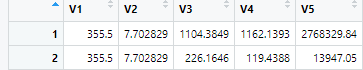